### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sktime as sk
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.arima import AutoARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sktime.forecasting.compose import make_reduction
from sktime.transformations.series.detrend import Detrender,Deseasonalizer
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.ets import AutoETS
from sktime.performance_metrics.forecasting import MeanRelativeAbsoluteError
from sktime.performance_metrics.forecasting import MeanSquaredScaledError
from sktime.performance_metrics.forecasting import GeometricMeanAbsoluteError
from codes import *
rmsse = MeanSquaredScaledError(square_root=True)
gmae = GeometricMeanAbsoluteError()
la_models = []
pb_models = []

### Loading dataset from data folders and accessing the data variables and then reshaping it

In [2]:
train_data1 = np.load('data/METR-LA/train.npz')
train_data2 = np.load('data/PEMS-BAY/train.npz')
y_train1 = train_data1['y']
y_train1 = reshape_func(y_train1)
y_train1 = y_train1[:,0]
y_train1 = pd.DataFrame(y_train1)
y_train2 = train_data2['y']
y_train2 = reshape_func(y_train2)
y_train2 = y_train2[:,0]
y_train2 = pd.DataFrame(y_train2)

### Here we load the same variables from the test data and reshape them according to the same process for us to use.

In [3]:
test_data1 = np.load('data/METR-LA/test.npz')
y_test1 = test_data1['y']
y_test1 = reshape_func(y_test1)
y_test1 = y_test1[:,0]
y_test1 =  pd.DataFrame(y_test1)
test_data2 = np.load('data/PEMS-BAY/test.npz')
y_test2 = test_data2['y']
y_test2 = reshape_func(y_test2)
y_test2 = y_test2[:,0]
y_test2 =  pd.DataFrame(y_test2)

### Here we try some SKTIME basic models

In [4]:
la_model1 = model(y_train1,y_test1,ThetaForecaster(deseasonalize = False),False)
pb_model1 = model(y_train2,y_test2,ThetaForecaster(deseasonalize = False),False)
la_models.append(la_model1)
pb_models.append(pb_model1)

Text(0, 0.5, 'Speeds')

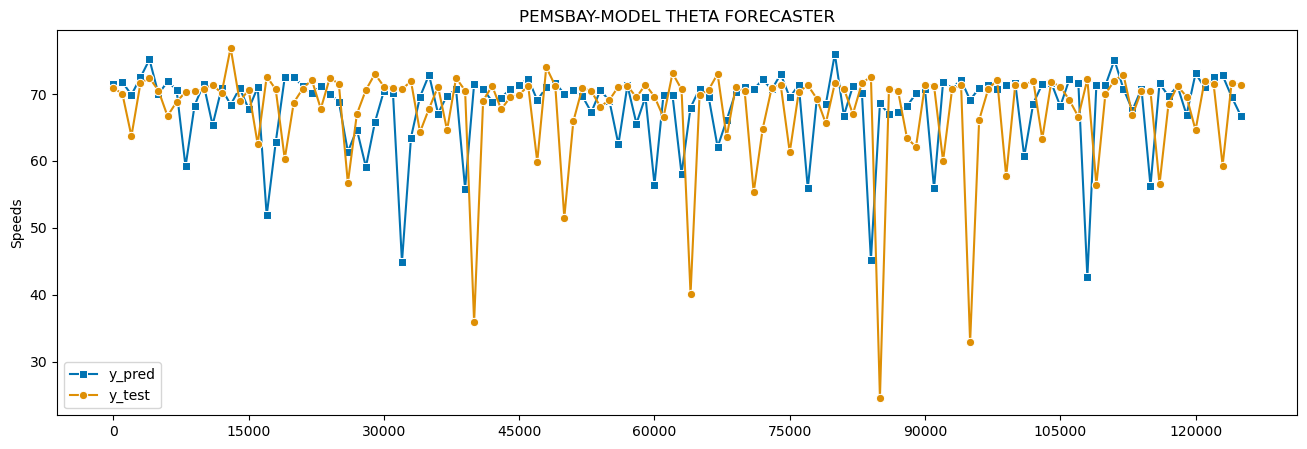

In [5]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pb_model1[3][0::1000],y_test2[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("PEMSBAY-MODEL THETA FORECASTER")
ax.set_ylabel("Speeds")

Text(0, 0.5, 'Speeds')

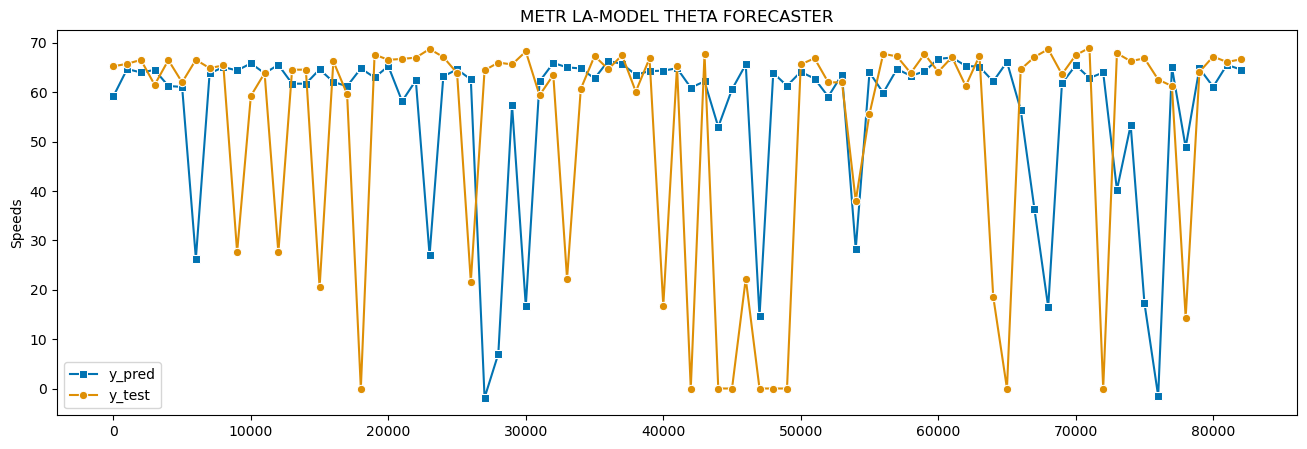

In [6]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(la_model1[3][0::1000],y_test1[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("METR LA-MODEL THETA FORECASTER")
ax.set_ylabel("Speeds")

### To reduce error due to zero speeds, let's make some changes to the training and testing data
### We impute the zero speeds with last known value (the function can be found in codes.py file)


In [7]:
ytrain_zfill1 = fillzeros(y_train1)
ytest_zfill1 = fillzeros(y_test1)
ytrain_zfill2 = fillzeros(y_train2)
ytest_zfill2 = fillzeros(y_test2)
la_model2 = model(ytrain_zfill1,ytest_zfill1,ThetaForecaster(deseasonalize=False),False)
pb_model2 = model(ytrain_zfill2,ytest_zfill2,ThetaForecaster(deseasonalize=False),False)
la_models.append(la_model2)
pb_models.append(pb_model2)

Text(0, 0.5, 'Speeds')

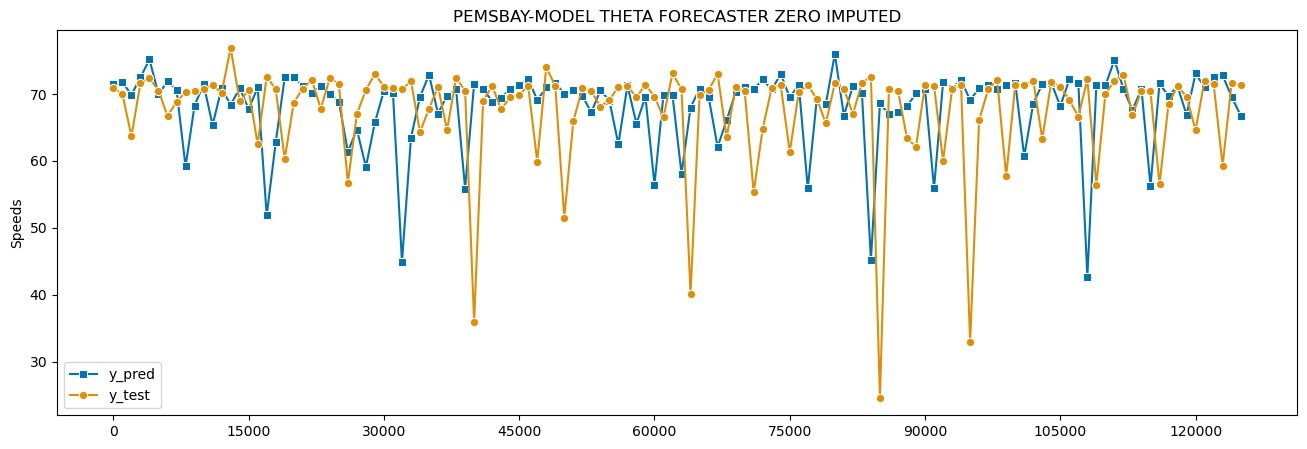

In [8]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pb_model2[3][0::1000],ytest_zfill2[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("PEMSBAY-MODEL THETA FORECASTER ZERO IMPUTED")
ax.set_ylabel("Speeds")

Text(0, 0.5, 'Speeds')

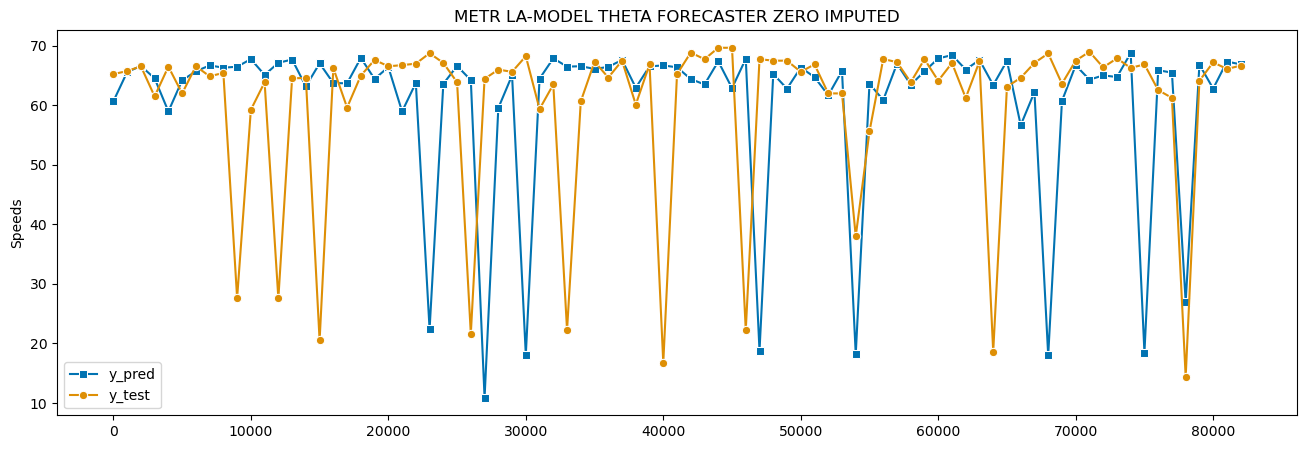

In [9]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(la_model2[3][0::1000],ytest_zfill1[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("METR LA-MODEL THETA FORECASTER ZERO IMPUTED")
ax.set_ylabel("Speeds")

### We try to remove the trend and seasonality

In [10]:
la_model3 = model(ytrain_zfill1,ytest_zfill1,ThetaForecaster(deseasonalize=False),True)
pb_model3 = model(ytrain_zfill2,ytest_zfill2,ThetaForecaster(deseasonalize=False),True)
la_models.append(la_model3)
pb_models.append(pb_model3)

Text(0, 0.5, 'Speeds')

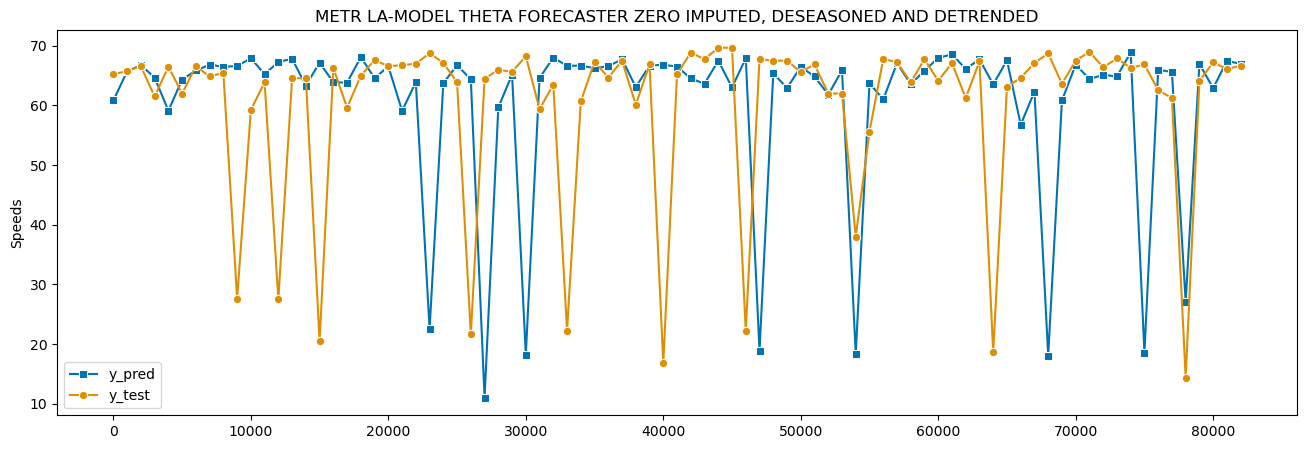

In [11]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(la_model3[3][0::1000],ytest_zfill1[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("METR LA-MODEL THETA FORECASTER ZERO IMPUTED, DESEASONED AND DETRENDED")
ax.set_ylabel("Speeds")

Text(0, 0.5, 'Speeds')

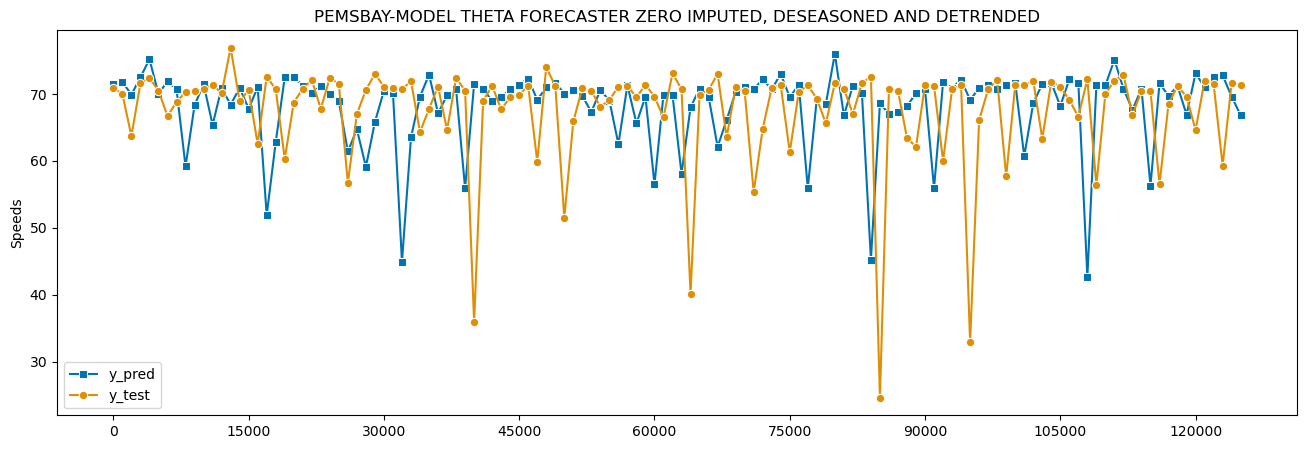

In [12]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pb_model3[3][0::1000],ytest_zfill2[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("PEMSBAY-MODEL THETA FORECASTER ZERO IMPUTED, DESEASONED AND DETRENDED")
ax.set_ylabel("Speeds")

In [13]:
la_model4 = model(y_train1,y_test1,ThetaForecaster(deseasonalize=False),True)
pb_model4 = model(y_train2,y_test2,ThetaForecaster(deseasonalize=False),True)
la_models.append(la_model4)
pb_models.append(pb_model4)

Text(0, 0.5, 'Speeds')

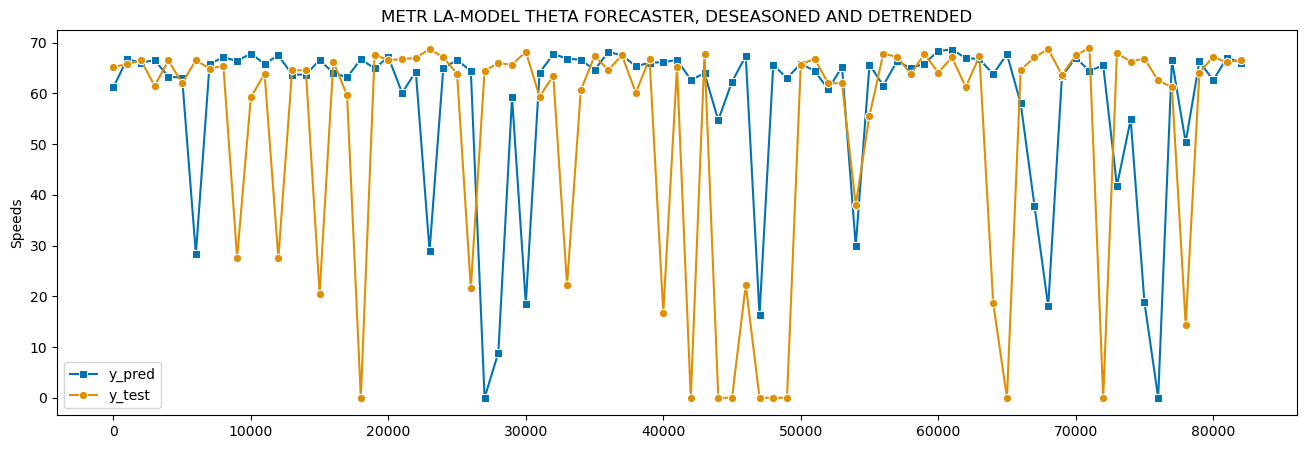

In [14]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(la_model4[3][0::1000],y_test1[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("METR LA-MODEL THETA FORECASTER, DESEASONED AND DETRENDED")
ax.set_ylabel("Speeds")

Text(0, 0.5, 'Speeds')

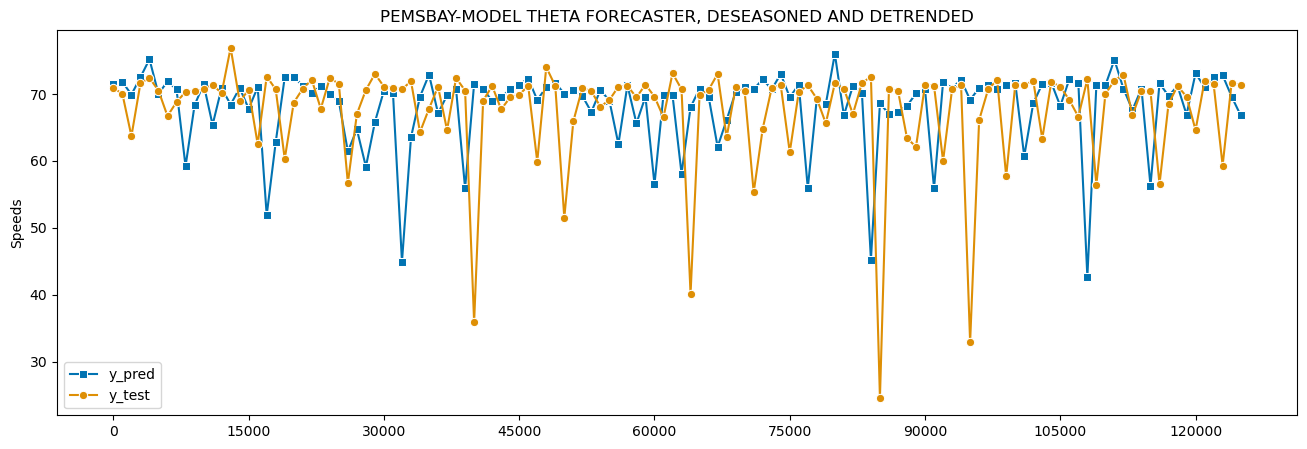

In [15]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pb_model4[3][0::1000],y_test2[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("PEMSBAY-MODEL THETA FORECASTER, DESEASONED AND DETRENDED")
ax.set_ylabel("Speeds")

### Now we are going to develop some more arima models

In [16]:
la_model5 = model(y_train1,y_test1,ARIMA(),False)
pb_model5 = model(y_train2,y_test2,ARIMA(),False)
la_models.append(la_model5)
pb_models.append(pb_model5)

Text(0, 0.5, 'Speeds')

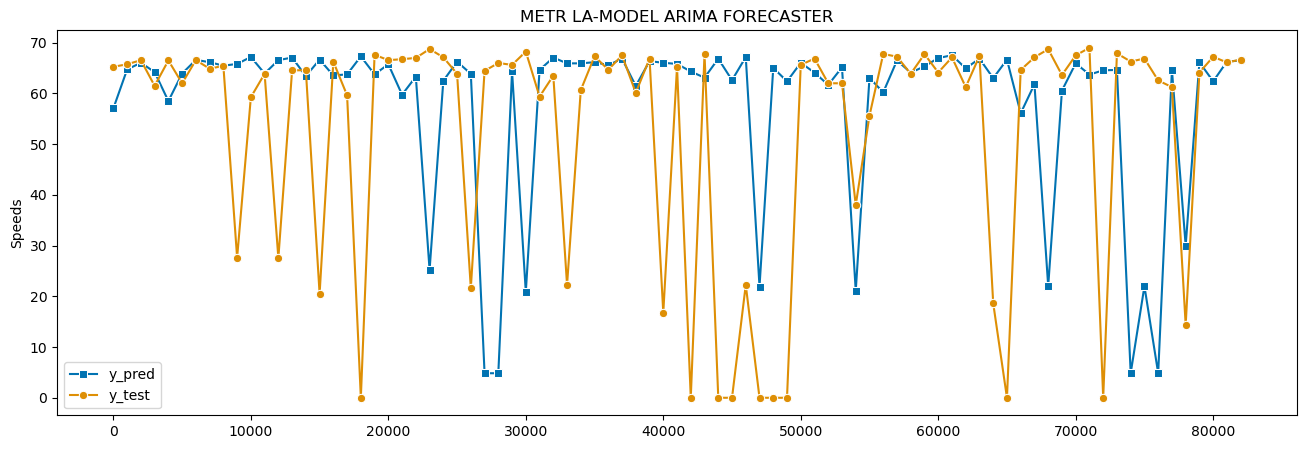

In [17]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(la_model5[3][0::1000],y_test1[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("METR LA-MODEL ARIMA FORECASTER")
ax.set_ylabel("Speeds")

Text(0, 0.5, 'Speeds')

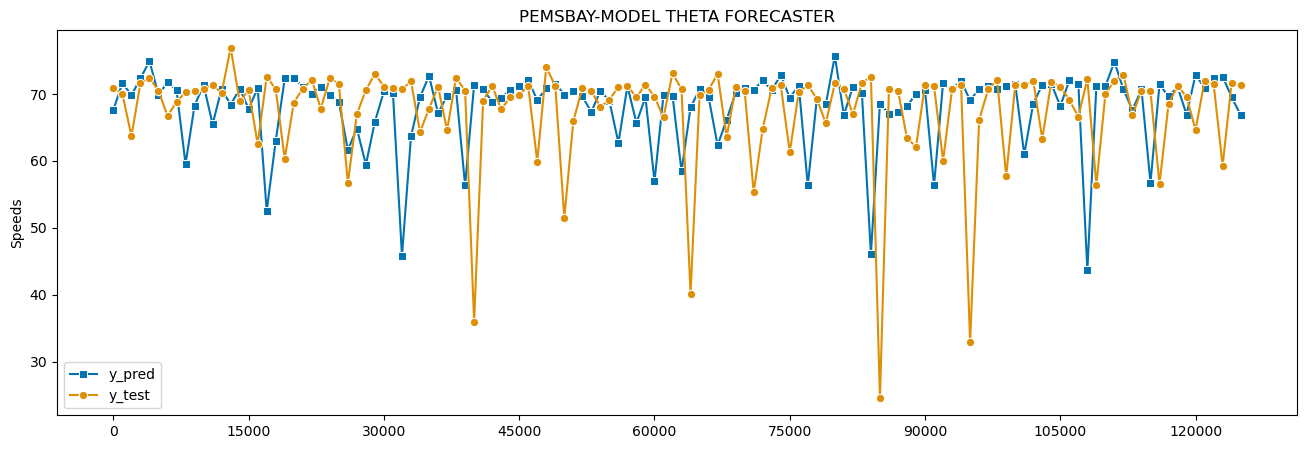

In [18]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pb_model5[3][0::1000],y_test2[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("PEMSBAY-MODEL ARIMA FORECASTER")
ax.set_ylabel("Speeds")

In [19]:
la_model6 = model(ytrain_zfill1,ytest_zfill1,ARIMA(),False)
pb_model6 = model(ytrain_zfill2,ytest_zfill2,ARIMA(),False)
la_models.append(la_model6)
pb_models.append(pb_model6)

Text(0, 0.5, 'Speeds')

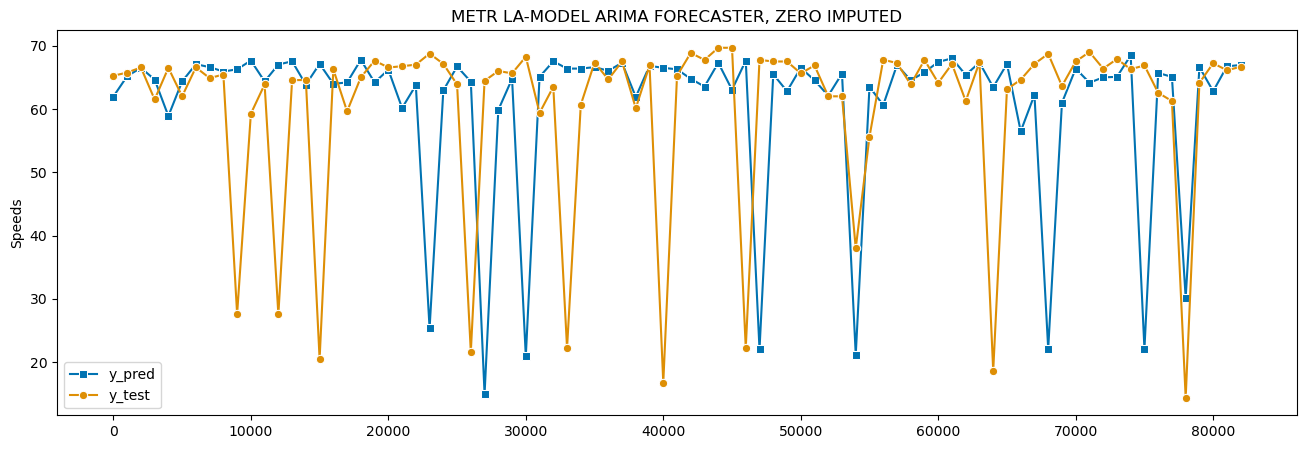

In [20]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(la_model6[3][0::1000],ytest_zfill1[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("METR LA-MODEL ARIMA FORECASTER, ZERO IMPUTED")
ax.set_ylabel("Speeds")

Text(0, 0.5, 'Speeds')

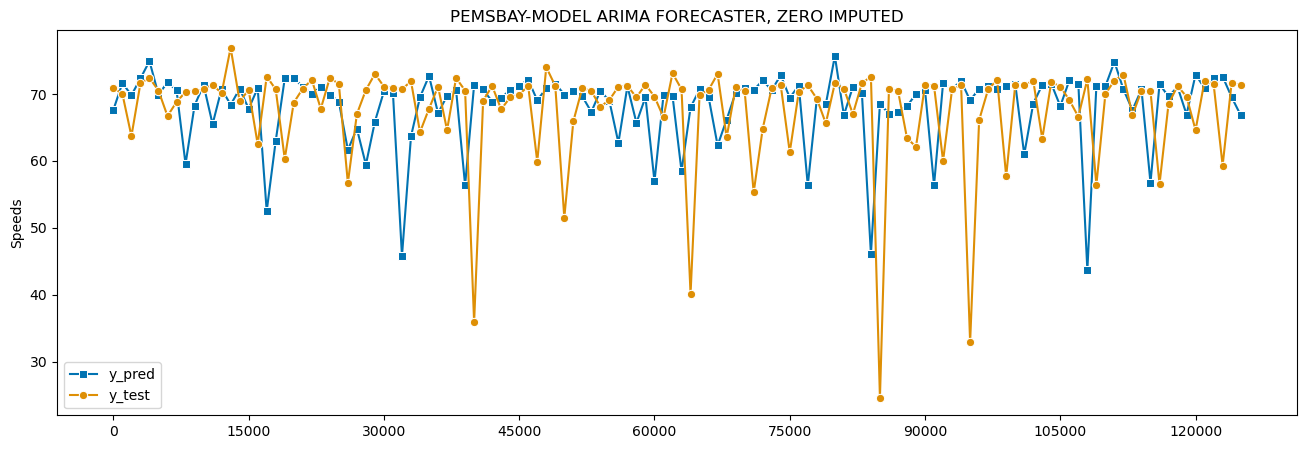

In [21]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pb_model6[3][0::1000],ytest_zfill2[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("PEMSBAY-MODEL ARIMA FORECASTER, ZERO IMPUTED")
ax.set_ylabel("Speeds")

## Now we apply autoETS models

In [22]:
la_model7 = model(y_train1,y_test1,AutoETS(auto=True),False)
pb_model7 = model(y_train2,y_test2,AutoETS(auto=True),False)
la_models.append(la_model7)
pb_models.append(pb_model7)

D:\Anaconda\envs\dcrnn\lib\site-packages\sktime\forecasting\ets.py:248: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(


Text(0, 0.5, 'Speeds')

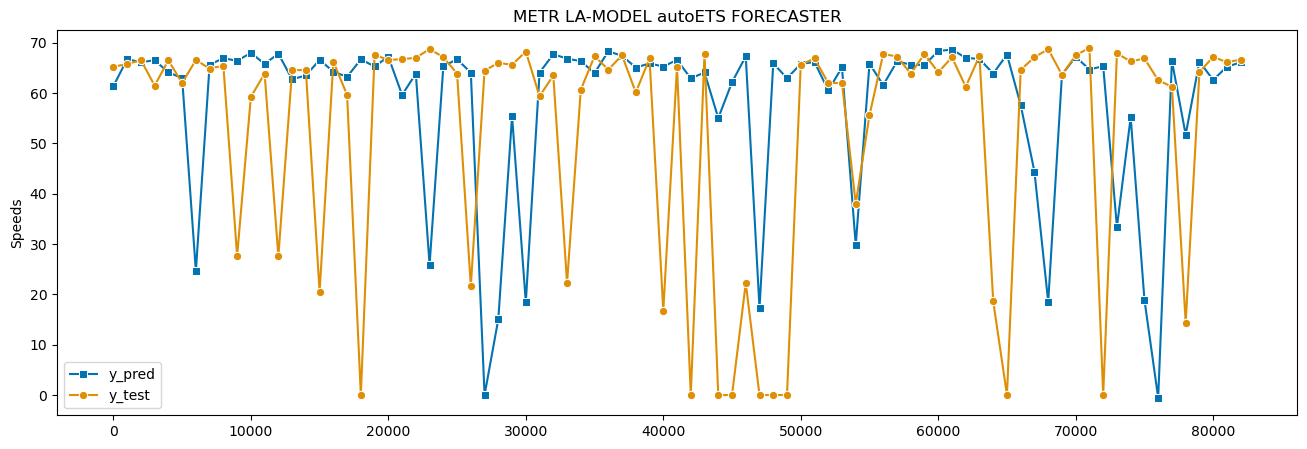

In [23]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(la_model7[3][0::1000],y_test1[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("METR LA-MODEL autoETS FORECASTER")
ax.set_ylabel("Speeds")

Text(0, 0.5, 'Speeds')

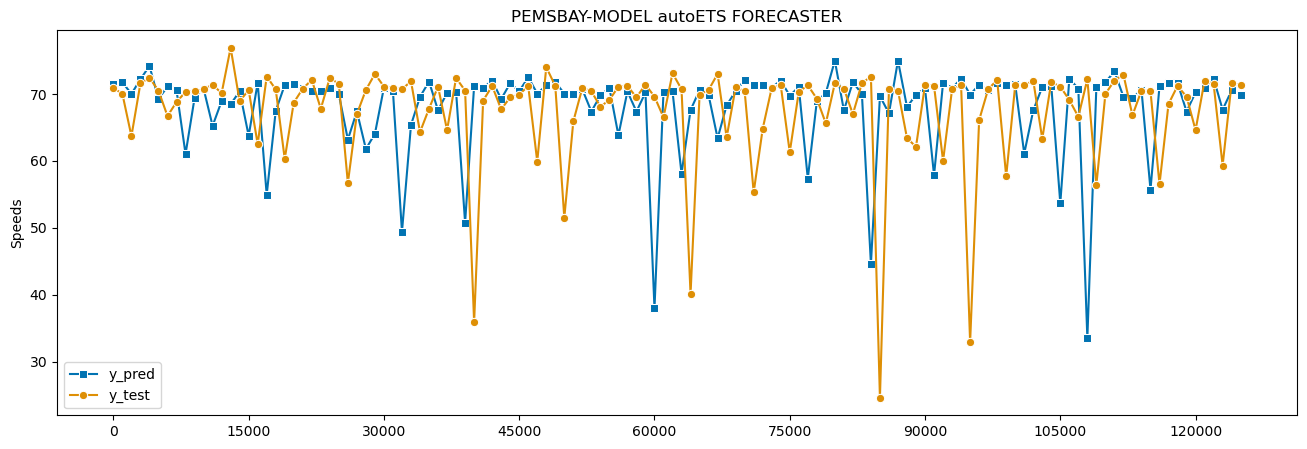

In [24]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pb_model7[3][0::1000],y_test2[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("PEMSBAY-MODEL autoETS FORECASTER")
ax.set_ylabel("Speeds")

In [25]:
la_model8 = model(ytrain_zfill1,ytest_zfill1,AutoETS(auto=True),False)
pb_model8 = model(ytrain_zfill2,ytest_zfill2,AutoETS(auto=True),False)
la_models.append(la_model8)
pb_models.append(pb_model8)

Text(0, 0.5, 'Speeds')

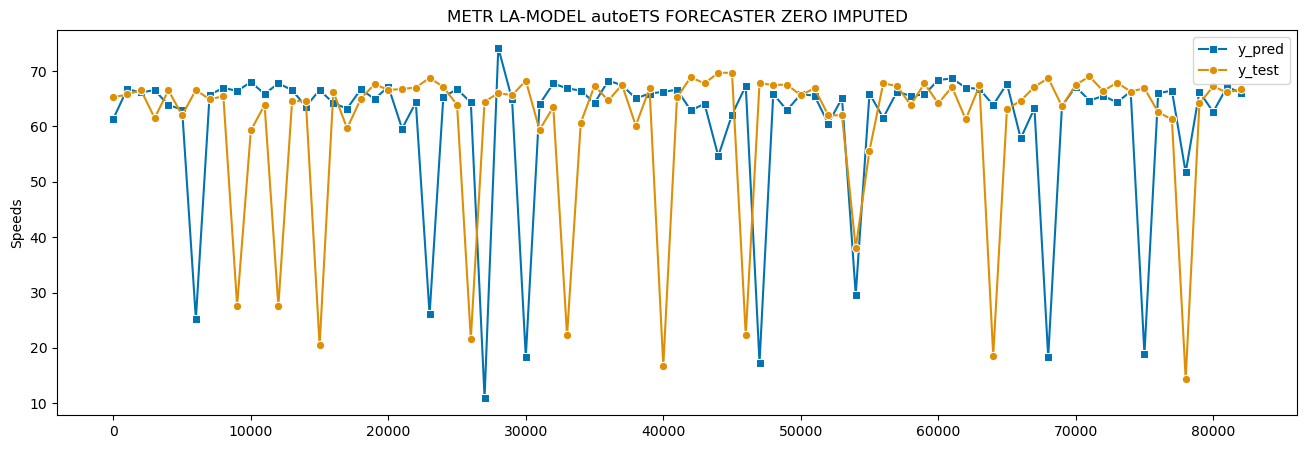

In [26]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(la_model8[3][0::1000],ytest_zfill1[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("METR LA-MODEL autoETS FORECASTER ZERO IMPUTED")
ax.set_ylabel("Speeds")

Text(0, 0.5, 'Speeds')

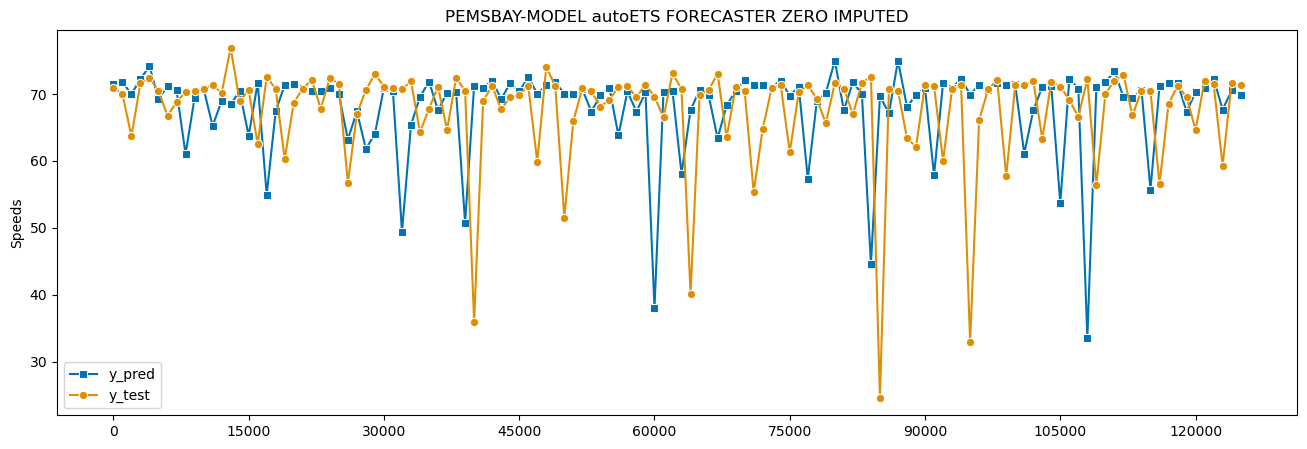

In [27]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pb_model8[3][0::1000],ytest_zfill2[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("PEMSBAY-MODEL autoETS FORECASTER ZERO IMPUTED")
ax.set_ylabel("Speeds")

In [28]:
N = len(la_models)
smape_la = np.zeros(N)
gmae_la = np.zeros(N)
rmsse_la = np.zeros(N)

for i in range(N):
    smape_la[i] = la_models[i][0]
    rmsse_la[i] = la_models[i][1]
    gmae_la[i] = la_models[i][2]

In [29]:
M = len(pb_models)
smape_pb = np.zeros(M)
gmae_pb = np.zeros(M)
rmsse_pb = np.zeros(M)

for i in range(M):
    smape_pb[i] = pb_models[i][0]
    rmsse_pb[i] = pb_models[i][1]
    gmae_pb[i] = pb_models[i][2]

Text(0.5, 1.0, 'METR LA-MODELS ERROR METRICS')

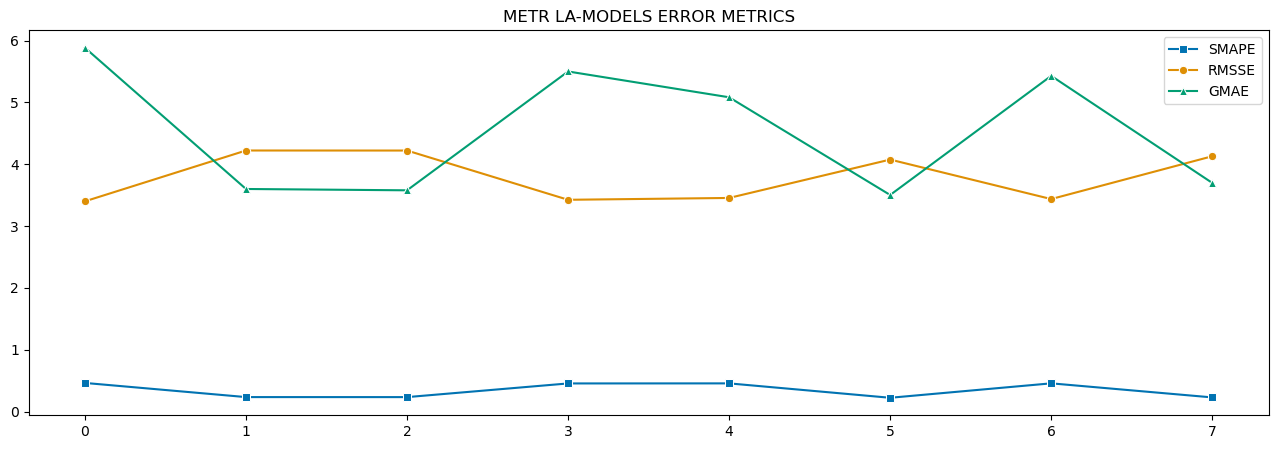

In [30]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pd.DataFrame(smape_la),pd.DataFrame(rmsse_la),pd.DataFrame(gmae_la),markers=['s','o','^'],
            ax=ax,labels = ["SMAPE","RMSSE","GMAE"])
ax.set_title("METR LA-MODELS ERROR METRICS")
#ax.set_ylabel("Speeds")

Text(0.5, 1.0, 'PEMS BAY-MODELS ERROR METRICS')

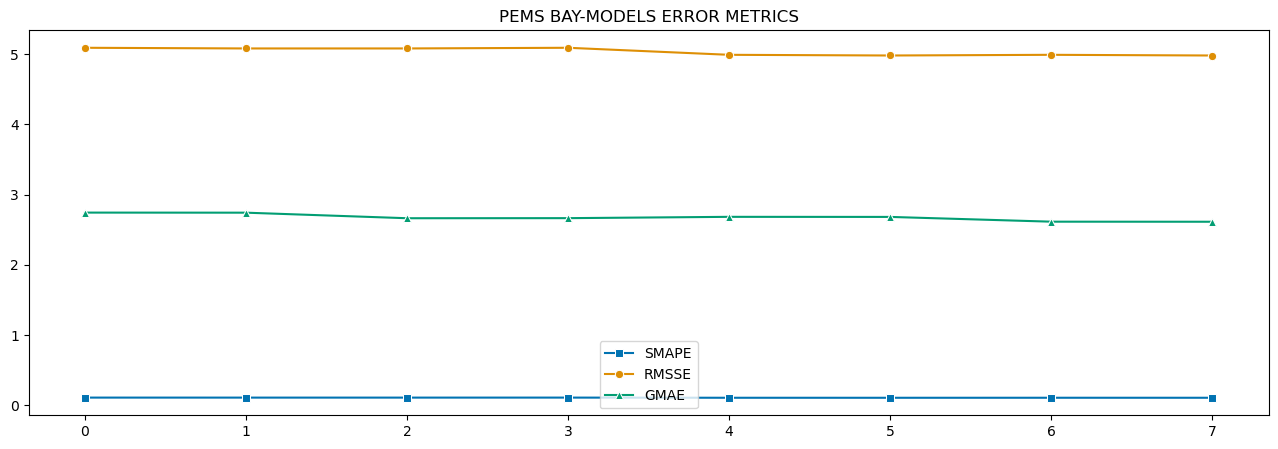

In [31]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pd.DataFrame(smape_pb),pd.DataFrame(rmsse_pb),pd.DataFrame(gmae_pb),markers=['s','o','^'],
            ax=ax,labels = ["SMAPE","RMSSE","GMAE"])
ax.set_title("PEMS BAY-MODELS ERROR METRICS")
#ax.set_ylabel("Speeds")

### Visualizing PEMS-BAY dataset

Text(0, 0.5, 'Speeds')

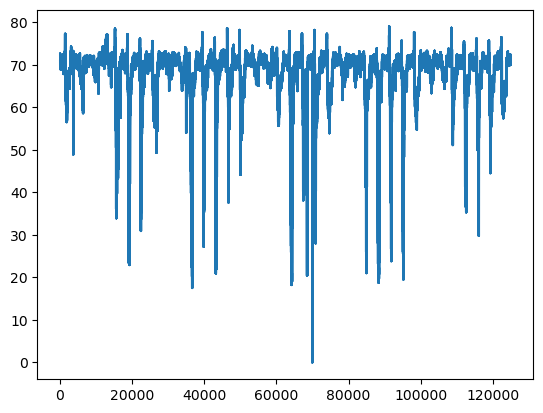

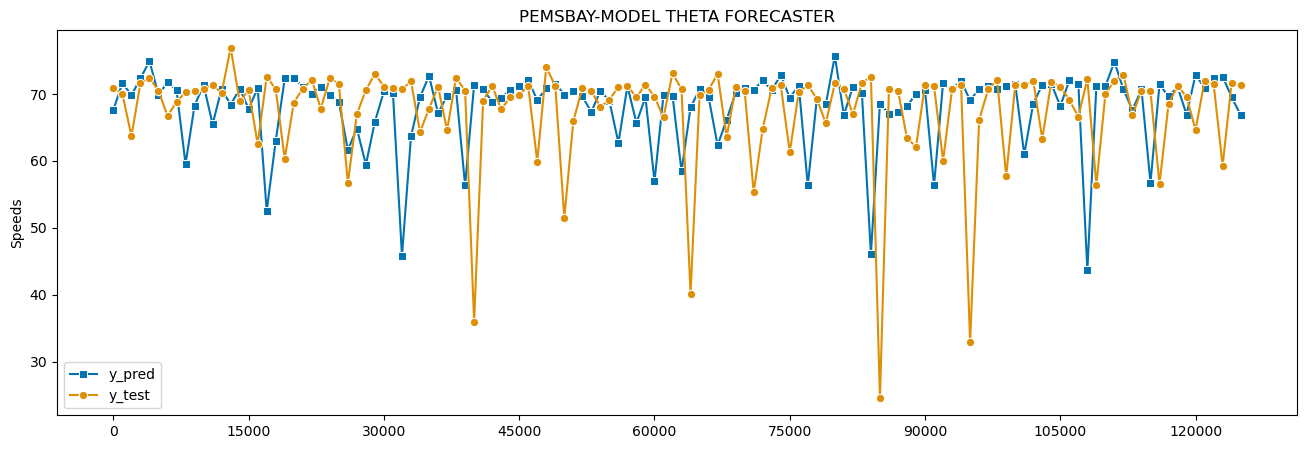

In [32]:
plt.plot(y_test2)
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pb_model5[3][0::1000],y_test2[0::1000],markers = ['s','o'],ax=ax,labels = ["y_pred","y_test"])
ax.set_title("PEMSBAY-MODEL THETA FORECASTER")
ax.set_ylabel("Speeds")

### Difference between the means of datasets, Generating data for daily by averaging over each day

In [33]:
print("Mean of PEMS-Bay",np.mean(y_train2,axis=0).iloc[0])
print("Mean of METR-LA",np.mean(y_train1,axis=0).iloc[0])
daily1 = []
daily2 = []
for i in range(1000):
    daily1.append(np.mean(y_train1[0][i*(12*24):(i+1)*12*24-1]))
    daily2.append(np.mean(y_train2[0][i*(12*24):(i+1)*12*24-1]))

Mean of PEMS-Bay 67.62756158873805
Mean of METR-LA 57.06333340257722


### Visualizing both datasets for 100 and 1000 days

Text(0, 0.5, 'Speeds')

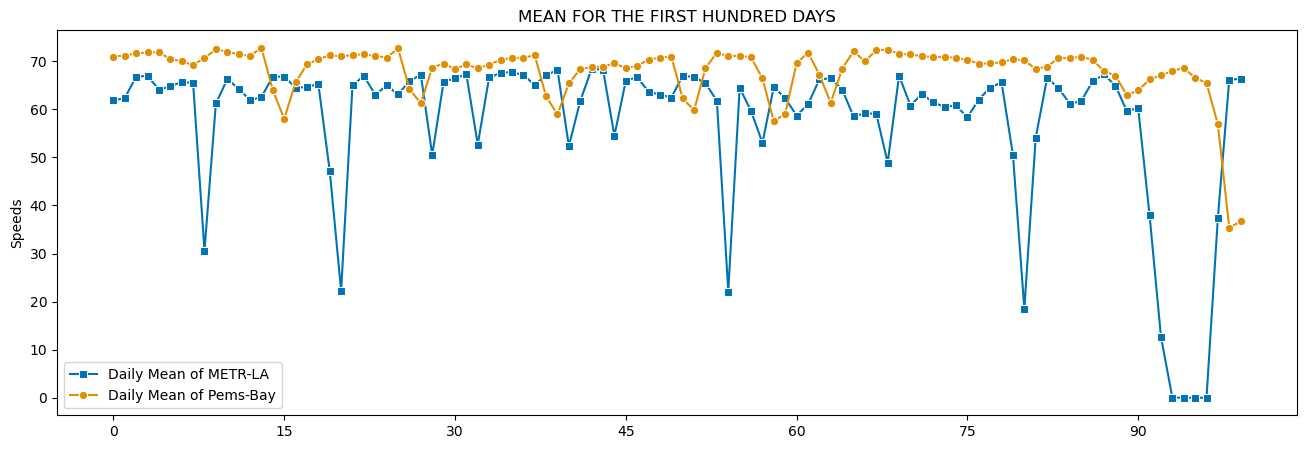

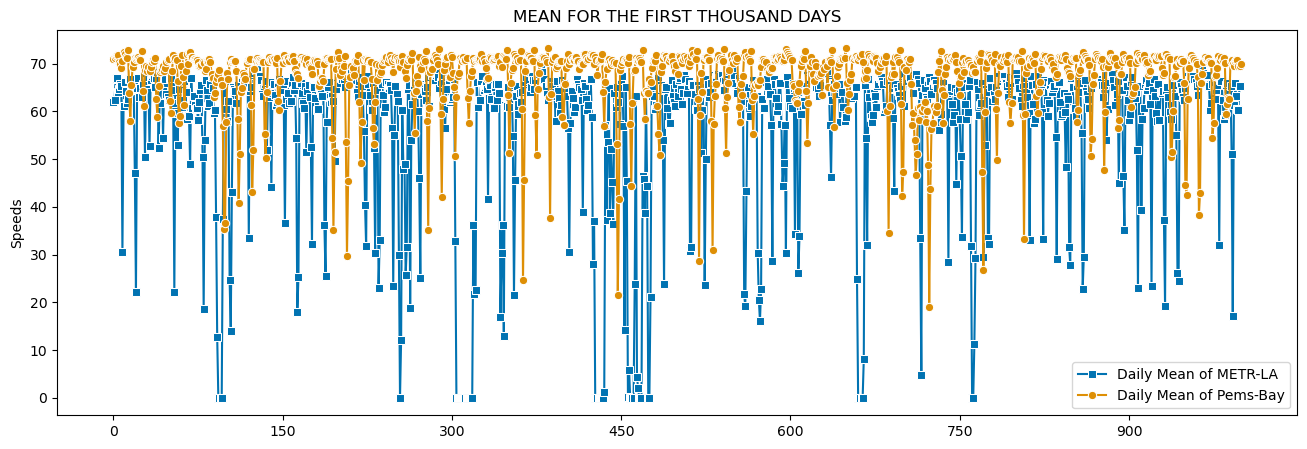

In [34]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pd.DataFrame(daily1)[0:100],pd.DataFrame(daily2)[0:100],markers = ['s','o'],ax=ax,
            labels = ("Daily Mean of METR-LA","Daily Mean of Pems-Bay"))
ax.set_title("MEAN FOR THE FIRST HUNDRED DAYS")
ax.set_ylabel("Speeds")

fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pd.DataFrame(daily1)[0:1000],pd.DataFrame(daily2)[0:1000],markers = ['s','o'],ax=ax,
            labels = ("Daily Mean of METR-LA","Daily Mean of Pems-Bay"))
ax.set_title("MEAN FOR THE FIRST THOUSAND DAYS")
ax.set_ylabel("Speeds")


### Similarly generating datasets for hourly daily and weekly for METR-LA Dataset


In [35]:
[h_train,h_test] = hourly_mean(y_train1,y_test1,10000)
[d_train,d_test] = daily_mean(y_train1,y_test1,999)
[w_train,w_test] = weekly_mean(y_train1,y_test1,140)

# to eliminate NAN values
h_test = h_test[0:6800]
d_test = d_test[0:250]
w_test = w_test[0:40]

Text(0, 0.5, 'Speeds')

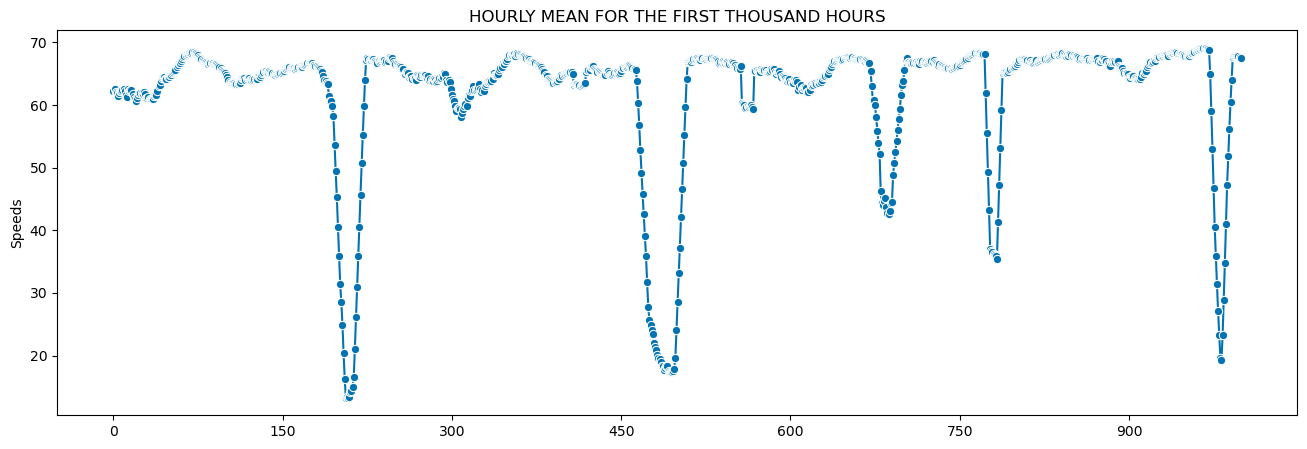

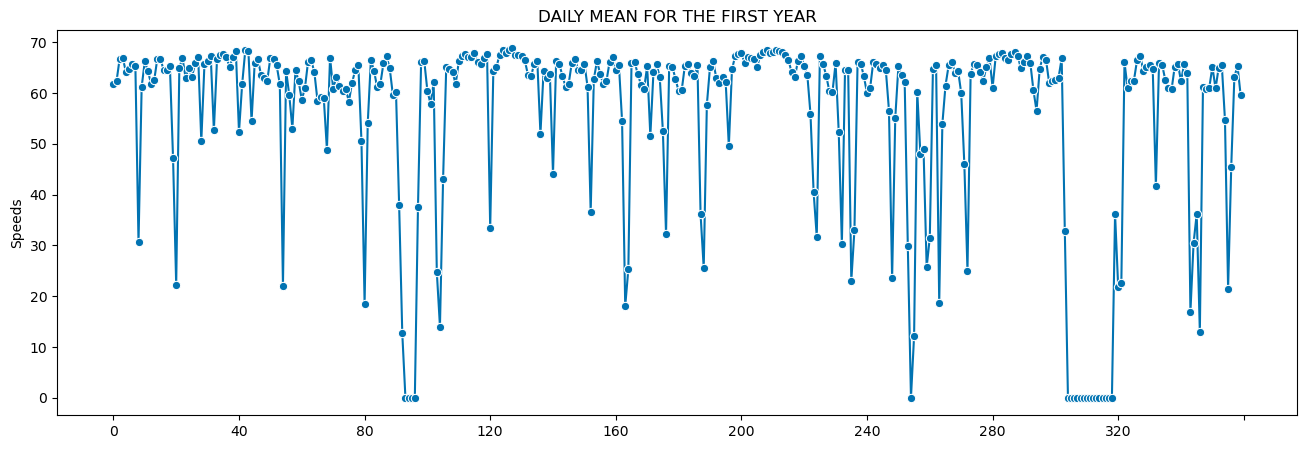

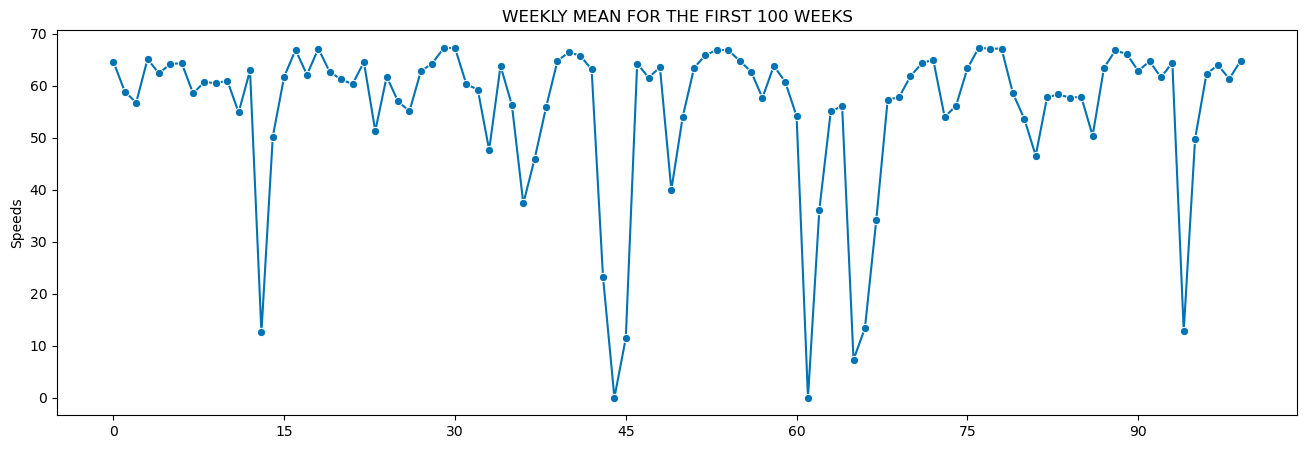

In [36]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(h_train[0:1000],ax=ax)
ax.set_title("HOURLY MEAN FOR THE FIRST THOUSAND HOURS")
ax.set_ylabel("Speeds")

fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(d_train[0:360],ax=ax)
ax.set_title("DAILY MEAN FOR THE FIRST YEAR")
ax.set_ylabel("Speeds")

fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(w_train[0:100],ax=ax)
ax.set_title("WEEKLY MEAN FOR THE FIRST 100 WEEKS")
ax.set_ylabel("Speeds")


### Trying to run same models on hourly, daily and weekly datasets

D:\Anaconda\envs\dcrnn\lib\site-packages\sktime\forecasting\ets.py:248: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(


Text(0.5, 1.0, 'HOURLY ERROR METRICS')

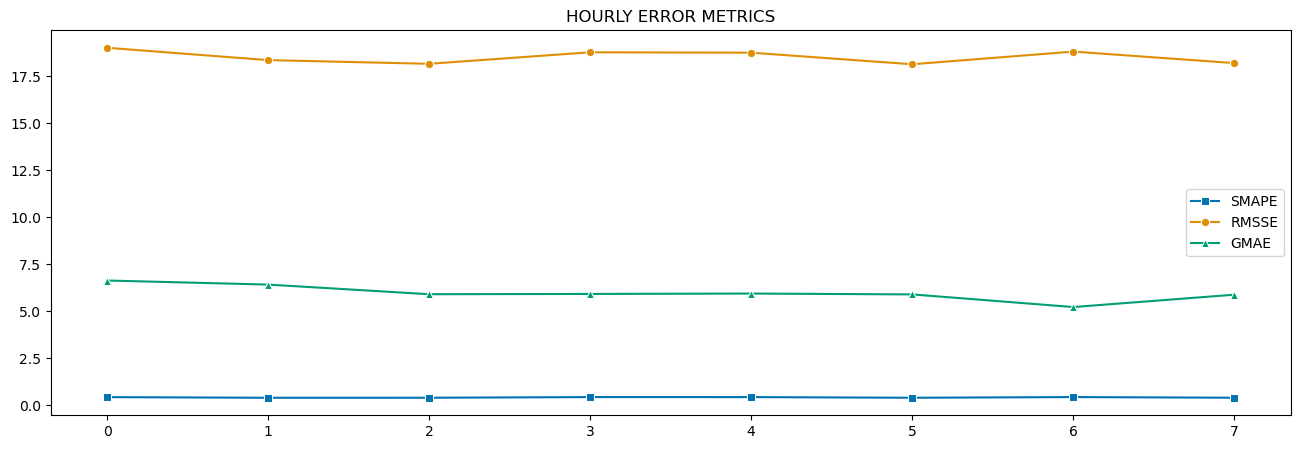

In [37]:
htrain_zfill = fillzeros(h_train)
htest_zfill = fillzeros(h_test)
dtrain_zfill = fillzeros(d_train)
dtest_zfill = fillzeros(w_test)
wtrain_zfill = fillzeros(w_train)
wtest_zfill = fillzeros(w_test)

h_models = []
h_model1 = model(h_train,h_test,ThetaForecaster(deseasonalize = False),False)
h_models.append(h_model1)
h_model2 = model(htrain_zfill,htest_zfill,ThetaForecaster(deseasonalize=False),False)
h_models.append(h_model2)
h_model3 = model(htrain_zfill,htest_zfill,ThetaForecaster(deseasonalize=False),True)
h_models.append(h_model3)
h_model4 = model(h_train,h_test,ThetaForecaster(deseasonalize=False),True)
h_models.append(h_model4)
h_model5 = model(h_train,h_test,ARIMA(),False)
h_models.append(h_model5)
h_model6 = model(htrain_zfill,htest_zfill,ARIMA(),False)
h_models.append(h_model6)
h_model7 = model(h_train,h_test,AutoETS(auto=True),False)
h_models.append(h_model7)
h_model8 = model(htrain_zfill,htest_zfill,AutoETS(auto=True),False)
h_models.append(h_model8)


N = len(h_models)
smape_h = np.zeros(N)
gmae_h = np.zeros(N)
rmsse_h = np.zeros(N)

for i in range(N):
    smape_h[i] = h_models[i][0]
    rmsse_h[i] = h_models[i][1]
    gmae_h[i] = h_models[i][2]

fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pd.DataFrame(smape_h),pd.DataFrame(rmsse_h),pd.DataFrame(gmae_h),markers = ['s','o','^'],ax=ax,
            labels = ("SMAPE","RMSSE","GMAE"))
ax.set_title("HOURLY ERROR METRICS")

D:\Anaconda\envs\dcrnn\lib\site-packages\sktime\forecasting\ets.py:248: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(


Text(0.5, 1.0, 'DAILY ERROR METRICS')

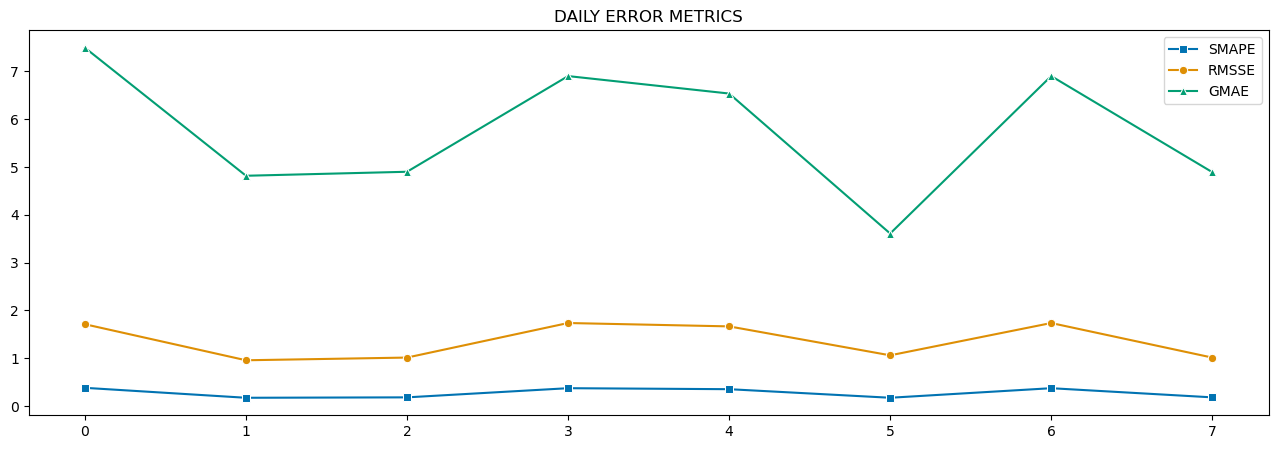

In [38]:
d_models = []
d_model1 = model(d_train,d_test,ThetaForecaster(deseasonalize = False),False)
d_models.append(d_model1)
d_model2 = model(dtrain_zfill,dtest_zfill,ThetaForecaster(deseasonalize=False),False)
d_models.append(d_model2)
d_model3 = model(dtrain_zfill,dtest_zfill,ThetaForecaster(deseasonalize=False),True)
d_models.append(d_model3)
d_model4 = model(d_train,d_test,ThetaForecaster(deseasonalize=False),True)
d_models.append(d_model4)
d_model5 = model(d_train,d_test,ARIMA(),False)
d_models.append(d_model5)
d_model6 = model(dtrain_zfill,dtest_zfill,ARIMA(),False)
d_models.append(d_model6)
d_model7 = model(d_train,d_test,AutoETS(auto=True),False)
d_models.append(d_model7)
d_model8 = model(dtrain_zfill,dtest_zfill,AutoETS(auto=True),False)
d_models.append(d_model8)


N = len(d_models)
smape_d = np.zeros(N)
gmae_d = np.zeros(N)
rmsse_d = np.zeros(N)

for i in range(N):
    smape_d[i] = d_models[i][0]
    rmsse_d[i] = d_models[i][1]
    gmae_d[i] = d_models[i][2]

fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pd.DataFrame(smape_d),pd.DataFrame(rmsse_d),pd.DataFrame(gmae_d),markers = ['s','o','^'],ax=ax,
            labels = ("SMAPE","RMSSE","GMAE"))
ax.set_title("DAILY ERROR METRICS")

D:\Anaconda\envs\dcrnn\lib\site-packages\sktime\forecasting\ets.py:248: UserWarning: Warning: time series is not strictly positive,multiplicative components are ommitted
  warnings.warn(


Text(0.5, 1.0, 'WEEKLY ERROR METRICS')

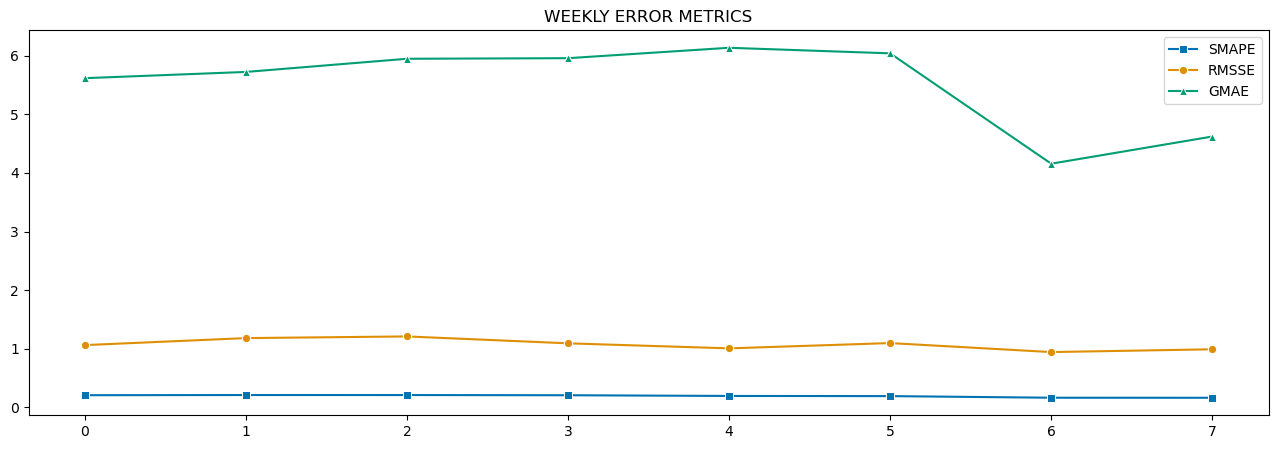

In [39]:
w_models = []
w_model1 = model(w_train,w_test,ThetaForecaster(deseasonalize = False),False)
w_models.append(w_model1)
w_model2 = model(wtrain_zfill,wtest_zfill,ThetaForecaster(deseasonalize=False),False)
w_models.append(w_model2)
w_model3 = model(wtrain_zfill,wtest_zfill,ThetaForecaster(deseasonalize=False),True)
w_models.append(w_model3)
w_model4 = model(w_train,w_test,ThetaForecaster(deseasonalize=False),True)
w_models.append(w_model4)
w_model5 = model(w_train,w_test,ARIMA(),False)
w_models.append(w_model5)
w_model6 = model(wtrain_zfill,wtest_zfill,ARIMA(),False)
w_models.append(w_model6)
w_model7 = model(w_train,w_test,AutoETS(auto=True),False)
w_models.append(w_model7)
w_model8 = model(wtrain_zfill,wtest_zfill,AutoETS(auto=True),False)
w_models.append(w_model8)


N = len(w_models)
smape_w = np.zeros(N)
gmae_w = np.zeros(N)
rmsse_w = np.zeros(N)

for i in range(N):
    smape_w[i] = w_models[i][0]
    rmsse_w[i] = w_models[i][1]
    gmae_w[i] = w_models[i][2]

fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pd.DataFrame(smape_w),pd.DataFrame(rmsse_w),pd.DataFrame(gmae_w),markers = ['s','o','^'],ax=ax,
            labels = ("SMAPE","RMSSE","GMAE"))
ax.set_title("WEEKLY ERROR METRICS")

Text(0.5, 1.0, 'SMAPE METRIC FOR ALL MODELS')

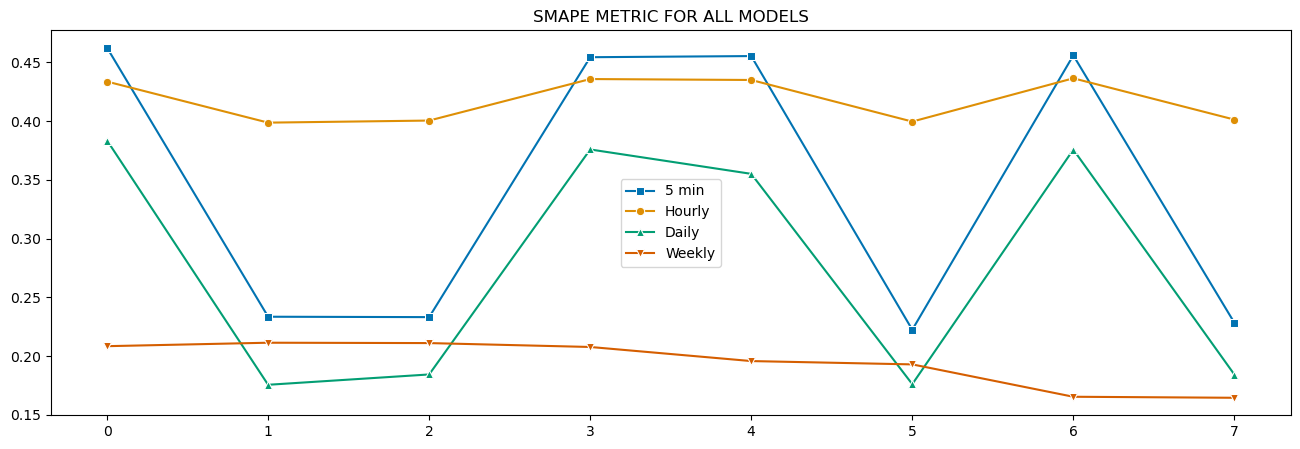

In [40]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pd.DataFrame(smape_la),pd.DataFrame(smape_h),
            pd.DataFrame(smape_d),pd.DataFrame(smape_w),markers = ['s','o','^','v'],ax=ax,
            labels=("5 min","Hourly","Daily","Weekly"))
ax.set_title("SMAPE METRIC FOR ALL MODELS")

Text(0.5, 1.0, 'RMSSE METRIC FOR ALL MODELS')

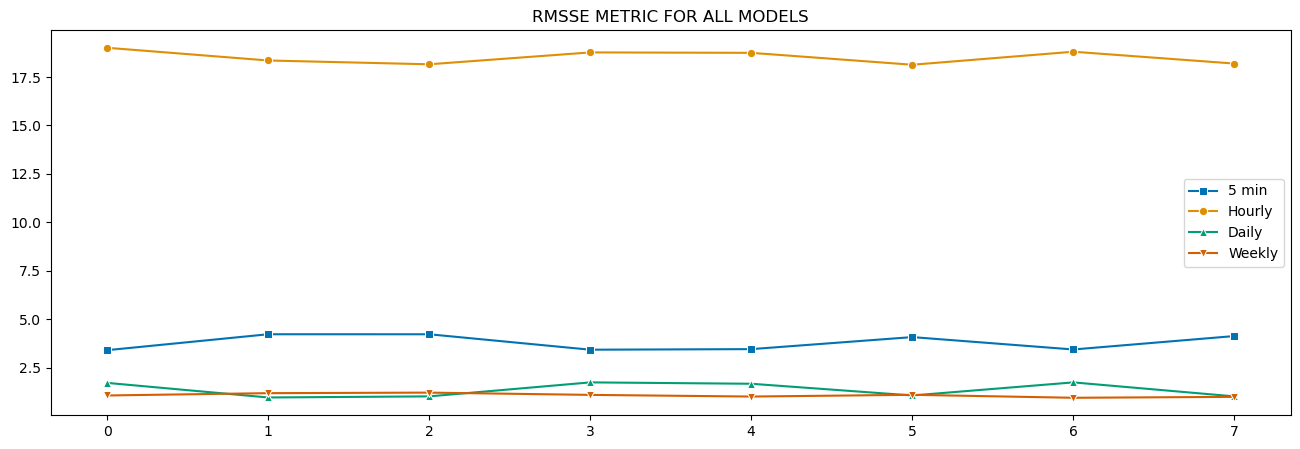

In [41]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pd.DataFrame(rmsse_la),pd.DataFrame(rmsse_h),pd.DataFrame(rmsse_d),pd.DataFrame(rmsse_w),
            markers = ['s','o','^','v'],ax=ax,
            labels=("5 min","Hourly","Daily","Weekly"))
ax.set_title("RMSSE METRIC FOR ALL MODELS")

Text(0.5, 1.0, 'GMAE METRIC FOR ALL MODELS')

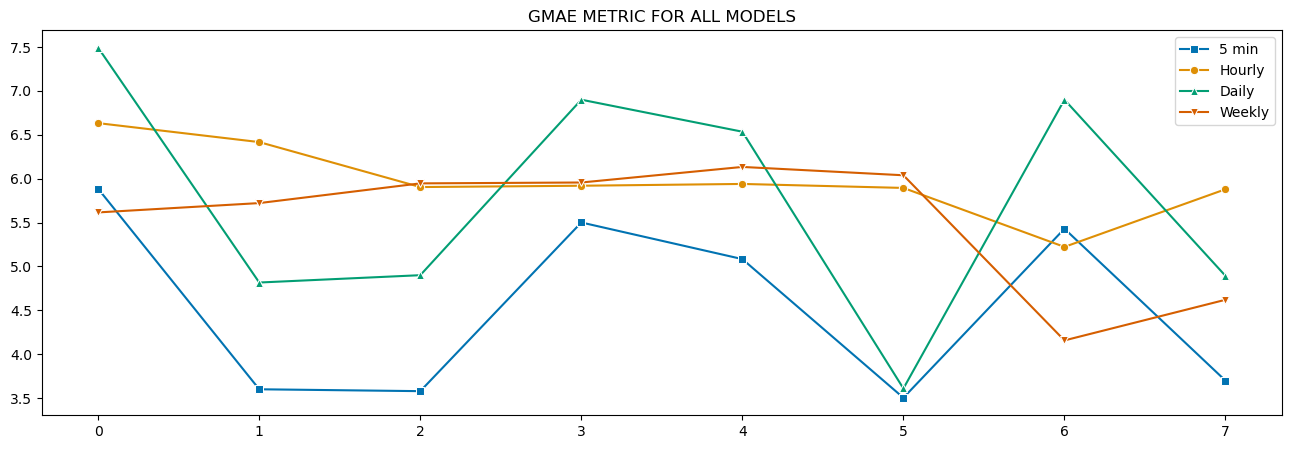

In [42]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
plot_series(pd.DataFrame(gmae_la),pd.DataFrame(gmae_h),pd.DataFrame(gmae_d),pd.DataFrame(gmae_w),
            markers = ['s','o','^','v'],ax=ax,
            labels=("5 min","Hourly","Daily","Weekly"))
ax.set_title("GMAE METRIC FOR ALL MODELS")